# Perbandingan Efektivitas Algoritma XGBoost dan MLP pada Klasifikasi Penyakit Diabetes

In [545]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [546]:
# Load dataset
df = pd.read_csv("../data/Dataset of Diabetes .csv")
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


class nya itu ada Diabetic, Non-Diabetic, and Predicted-
Diabetic

### Ringkasan Statistik Awal

In [547]:
# Informasi umum dataset
df.info()

# Statistik deskriptif
df.describe(include='all')
# Tujuan: melihat tipe data, missing values, distribusi nilai minimum, maksimum, rata-rata, dll.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1000.000000,1.000000e+03,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,NaN,NaN,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,840
mean,340.500000,2.705514e+05,NaN,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020,NaN
std,240.397673,3.380758e+06,NaN,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388,NaN
min,1.000000,1.230000e+02,NaN,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,NaN
25%,125.750000,2.406375e+04,NaN,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,NaN
50%,300.500000,3.439550e+04,NaN,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,NaN
75%,550.250000,4.538425e+04,NaN,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,NaN


In [548]:
# Melihat nama kolom untuk identifikasi kolom label
print(df.columns)


Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')


## Pemahaman Dataset 
Menggunakan : 
1. Distribusi Fitur Numerik
2. Kolerasi Fitur Numerik

### 1. Distribusi Fitur Numerik

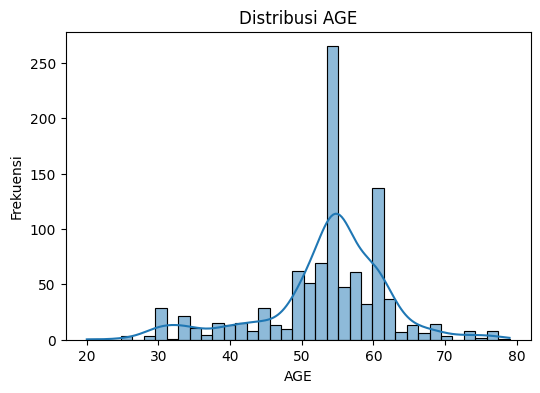

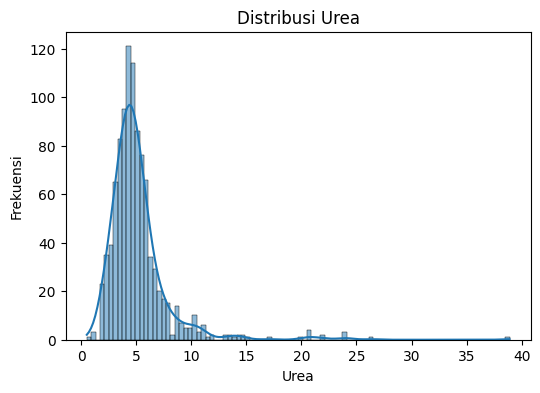

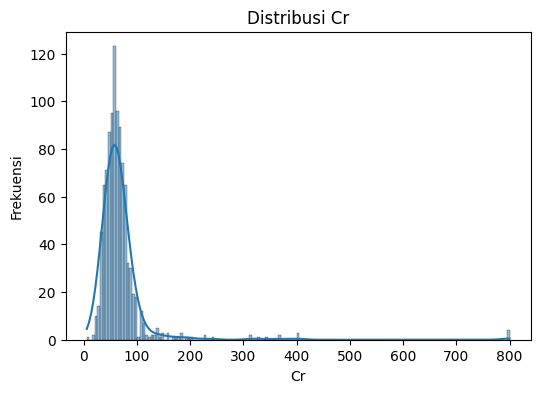

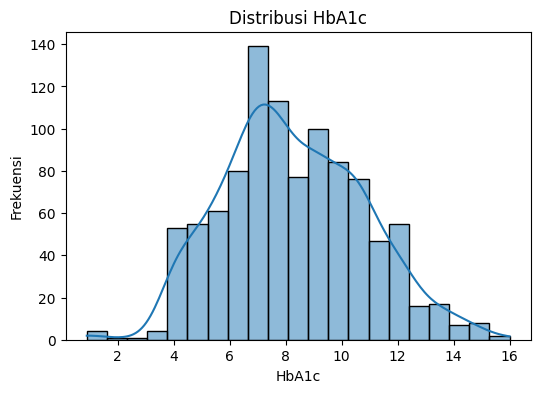

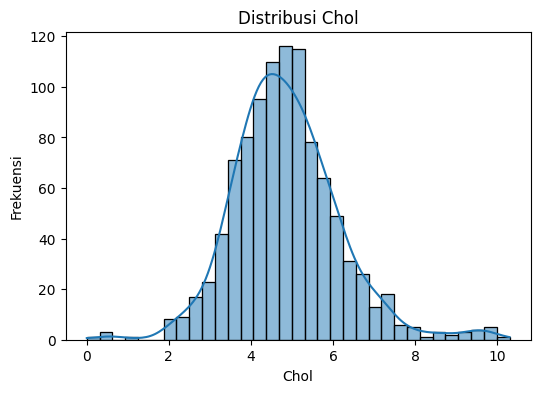

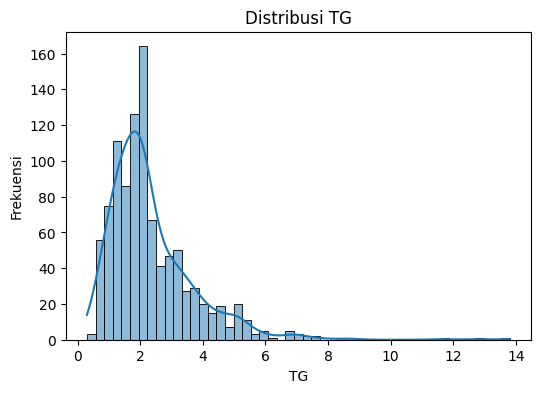

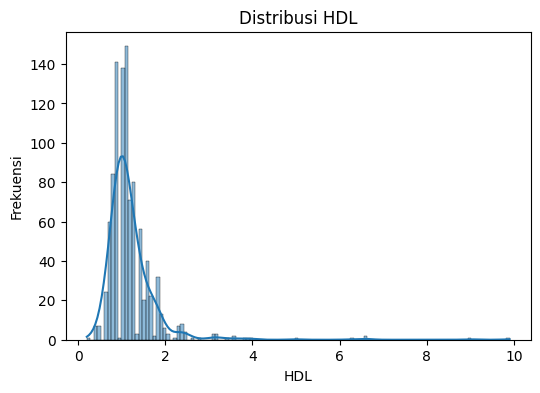

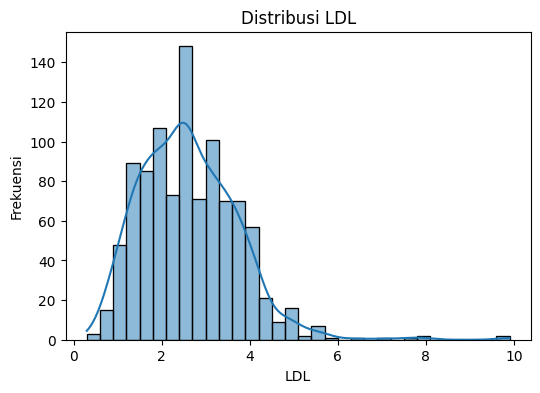

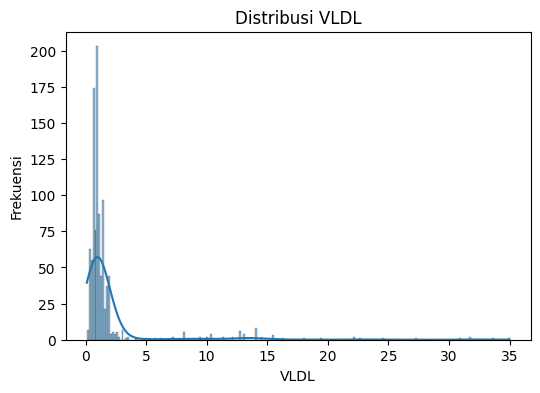

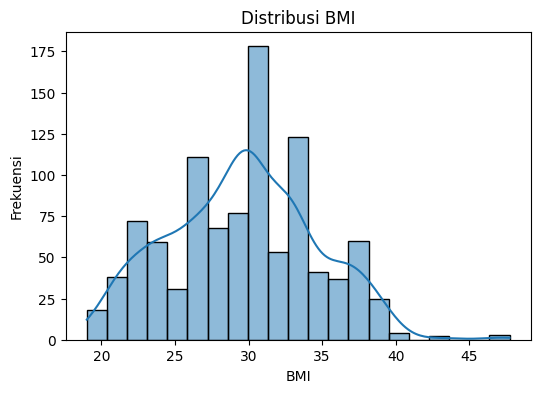

Jumlah data: 1000
Jumlah fitur: 14
Kolom yang memiliki missing values: Series([], dtype: int64)


In [549]:
# Contoh: distribusi fitur penting
# Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG','HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],dtype='object')
features = ['AGE', 'Urea', 'Cr','HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
# Tujuan: Memvisualisasikan distribusi fitur penting untuk memahami karakteristik data.

for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()
# Tujuan: Memahami distribusi fitur penting dalam dataset. Apakah ada outlier atau distribusi yang tidak normal?
# Mengetahui apakah fitur berdistribusi normal, skewed, atau memiliki outlier.

print("Jumlah data:", df.shape[0])
print("Jumlah fitur:", df.shape[1])
print("Kolom yang memiliki missing values:", df.isnull().sum()[df.isnull().sum() > 0])
# Tujuan: Memeriksa apakah ada missing values dalam dataset. Jika ada, perlu dilakukan penanganan missing values.   

### 2. Kolerasi Fitur Numerik
- +1: korelasi sempurna positif (jika satu naik, yang lain juga naik),
- 0: tidak ada korelasi,
- -1: korelasi sempurna negatif (jika satu naik, yang lain turun).
Penjelasan warna :
- Merah terang = korelasi positif tinggi
- Biru gelap = korelasi negatif
- Putih/pucat = korelasi rendah atau hampir nol

Tujuan Membuang variabel yang tidak berkolerasi 
pada tabel : Variabel seperti ID, No_Pation, dan Gender tidak memiliki korelasi bermakna karena bukan variabel medis atau fisiologis.

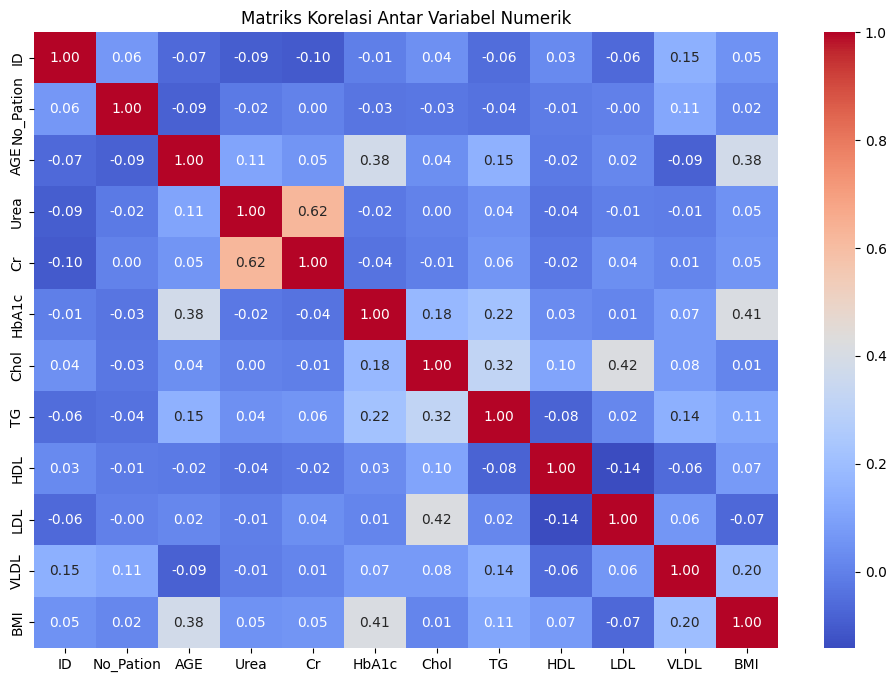

In [550]:
# Korelasi antar fitur numerik
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Variabel Numerik')
plt.show()
# 📌 Tujuan: Mengetahui fitur-fitur yang sangat berkorelasi (positif atau negatif). Bisa jadi petunjuk untuk feature selection atau multikolinearitas.

### Tampilkan Kolerasi dalam bentuk angka

In [551]:
# Salin dataframe dan encode kolom CLASS
df_corr = df.copy()
df_corr['CLASS'] = df_corr['CLASS'].map({'N': 0, 'P': 1, 'Y': 2})  # Encode kolom CLASS menjadi numerik

# Hitung korelasi terhadap CLASS
target_corr = df_corr.corr(numeric_only=True)['CLASS'].sort_values(ascending=False)
print("Korelasi Fitur terhadap Target (CLASS):")
print(target_corr)

# Tujuan: Mengetahui fitur mana yang paling berkaitan dengan diabetes.


Korelasi Fitur terhadap Target (CLASS):
CLASS        1.000000
BMI          0.570376
HbA1c        0.555931
AGE          0.447322
TG           0.182597
Chol         0.168110
VLDL         0.098799
Urea         0.068194
Cr           0.038369
LDL          0.004642
HDL         -0.002399
No_Pation   -0.047957
ID          -0.056995
Name: CLASS, dtype: float64


### Visualisasi Pair Plot

Visualisasi ini dibuat untuk melihat apakah ada pola atau pemisahan kelompok antara kelas CLASS berdasarkan fitur-fitur penting tersebut.
Misalnya:
- Apakah penderita diabetes cenderung memiliki HbA1c dan BMI lebih tinggi?
- Apakah usia bisa menjadi pembeda antara prediabetes dan non-diabetes?

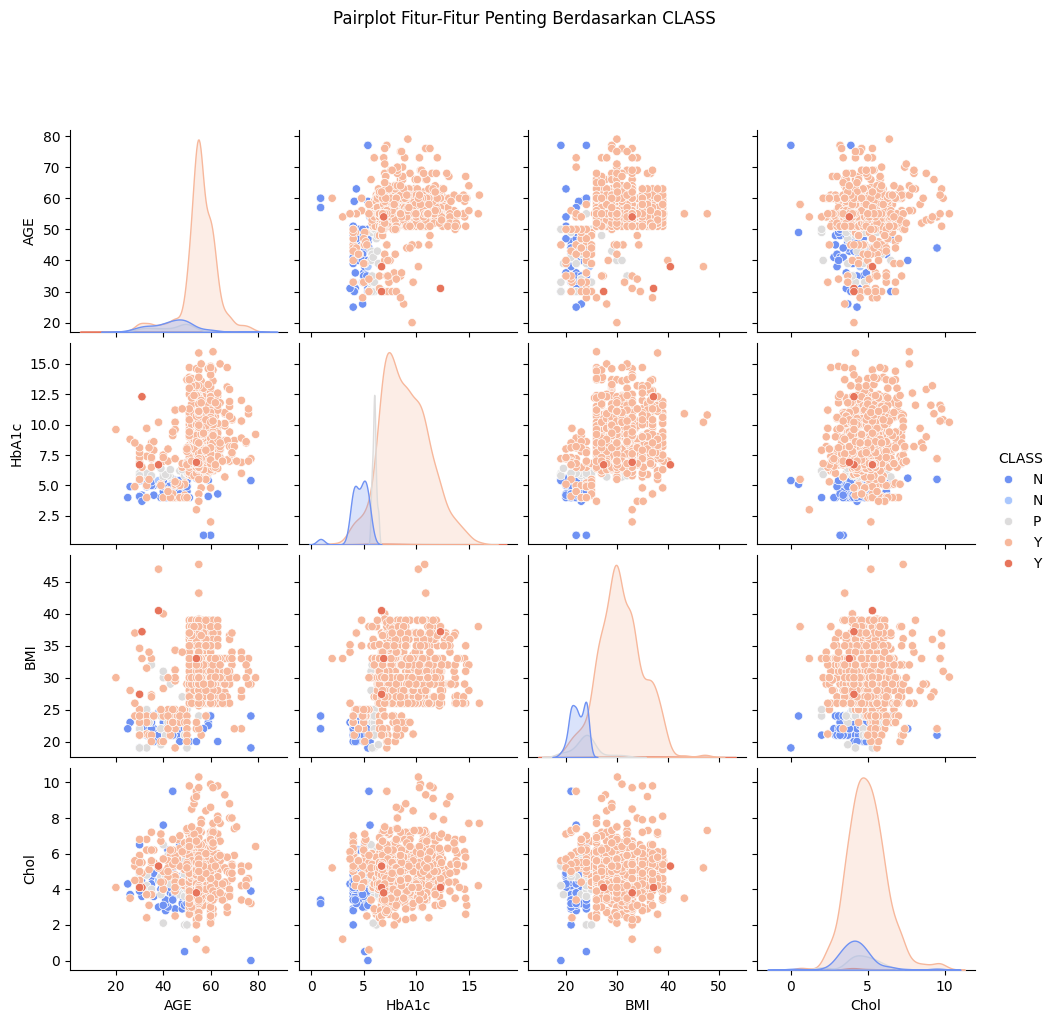

In [552]:
sns.pairplot(df, hue='CLASS', vars=['AGE', 'HbA1c', 'BMI', 'Chol'], palette='coolwarm', diag_kind='kde')
plt.subplots_adjust(top=0.9)  # Adjust the top to make room for the suptitle
plt.suptitle("Pairplot Fitur-Fitur Penting Berdasarkan CLASS", y=1.02)
plt.show()
# Tujuan: Visualisasi hubungan antar fitur penting dengan target CLASS. Apakah ada pola yang jelas antara fitur dan kelas?
# chol = kolesterol, HbA1c = hemoglobin A1c, BMI = Body Mass Index

#### PreProcessing Data
Pengelohan data sebelum digunakan

In [553]:
# Cek dan hapus duplikat
df.drop(columns=['ID', 'No_Pation'], inplace=True)
print("Jumlah data duplikat:", df.duplicated().sum())
# 1.2. Drop duplikat
df = df.drop_duplicates()
print("Jumlah data setelah Menghapus Duplikat :", df.shape)

Jumlah data duplikat: 169
Jumlah data setelah Menghapus Duplikat : (831, 12)


In [554]:
print("Jumlah data:", df.shape[0])
print("Jumlah fitur:", df.shape[1])
print("Kolom yang memiliki missing values:", df.isnull().sum()[df.isnull().sum() > 0])

# #Jumlah Data Outlier
# print("Jumlah data sebelum menghapus outlier:", df.shape)
# # 1.3. Hapus outlier sederhana dengan IQR pada tiap kolom numerik
# num_cols = df.select_dtypes(include=["int64","float64"]).columns
# for col in num_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
#     df = df[(df[col] >= lower) & (df[col] <= upper)]

# print("Jumlah data setelah menghapus outlier:", df.shape)


Jumlah data: 831
Jumlah fitur: 12
Kolom yang memiliki missing values: Series([], dtype: int64)


Hapus Duplikat - Berikan batas akhir dan awal untuk data yang tidak normal - Memisahkan sebuah fitur dan target (class)

#### Pemberian Label agar lebih rapi

In [555]:
# Normalisasi label CLASS
df['CLASS'] = df['CLASS'].astype(str).str.strip().str.upper()

# Tampilkan distribusi kelas setelah normalisasi
print("Distribusi kelas setelah normalisasi label:")
print(df['CLASS'].value_counts())


Distribusi kelas setelah normalisasi label:
CLASS
Y    695
N     96
P     40
Name: count, dtype: int64


#### Pisahkan Fitur dan Target
setelahnya lakukan split data yang sebagian data bernilai 20%  untuk menguji dan 80 % untuk belajar

In [556]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Encode kolom 'Gender' menjadi angka
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Misal 'F' -> 0, 'M' -> 1
# tujuan mengubah menjadi angka adalah untuk memudahkan pemrosesan data numerik

Kalau jumlah kelasnya tidak seimbang (misal terlalu banyak "YA" dibanding "TIDAK"),
SMOTE bantu menambah data palsu yang mirip aslinya biar adil jumlahnya.

Karena kalau satu kelas jauh lebih banyak dari yang lain, model bisa belajar hal yang salah.

### Cek Keseimbangan Kelas Target

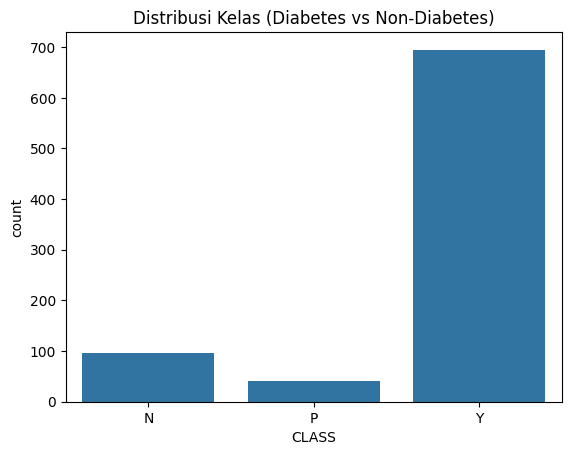

In [557]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='CLASS', data=df)
plt.title("Distribusi Kelas (Diabetes vs Non-Diabetes)")
plt.show()

#Tujuan: Apakah data target CLASS (N vs P) seimbang? Jika tidak, bisa pertimbangkan teknik resampling (SMOTE/ROS).


### Encode kolom 'CLASS' menjadi angka

In [558]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Salin data
df_model = df.copy()
print("Jumlah data sebelum encoding:", df_model.shape)


# Hapus label dengan jumlah terlalu sedikit
label_counts = df_model['CLASS'].value_counts()
valid_labels = label_counts[label_counts >= 2].index
df_model = df_model[df_model['CLASS'].isin(valid_labels)].copy()
print("Jumlah data setelah menghapus label dengan jumlah terlalu sedikit:", df_model.shape)


# Encode CLASS (multiclass)
le_class = LabelEncoder()
df_model['CLASS'] = le_class.fit_transform(df_model['CLASS'])
print("Label CLASS setelah encoding:", df_model['CLASS'].unique())
# Encode kolom-kolom kategorikal lainnya jika ada


# Drop kolom lain jika masih ada
df_model.drop(columns=['ID', 'No_Pation'], inplace=True, errors='ignore')
print("Jumlah data setelah drop kolom ID dan No_Pation:", df_model.shape)


Jumlah data sebelum encoding: (831, 12)
Jumlah data setelah menghapus label dengan jumlah terlalu sedikit: (831, 12)
Label CLASS setelah encoding: [0 1 2]
Jumlah data setelah drop kolom ID dan No_Pation: (831, 12)


### Normalisai dan Split Data

In [559]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Pisahkan fitur dan target
X = df_model.drop(columns=['CLASS'])
y = df_model['CLASS']
print("Jumlah fitur:", X.shape[1])
# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Contoh data setelah normalisasi:\n", X_scaled[:5])
print("Jumlah data setelah normalisasi:", X_scaled.shape)
# Tujuan: Memastikan data sudah siap untuk model.
# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)
print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])

Jumlah fitur: 11
Contoh data setelah normalisasi:
 [[-1.13270486e+00 -3.85649961e-01 -1.57581640e-01 -3.86996309e-01
  -1.31718470e+00 -5.25196805e-01 -1.02922477e+00  1.75312143e+00
  -1.05491144e+00 -3.67225364e-01 -1.09671208e+00]
 [ 8.74283921e-01 -3.09293712e+00 -2.22756518e-01 -1.17443010e-01
  -1.31718470e+00 -9.02464659e-01 -6.85067536e-01 -1.65234691e-01
  -4.34939544e-01 -3.39208078e-01 -1.29655326e+00]
 [ 8.74283921e-01 -2.30331170e+00  6.24516897e-01 -3.86996309e-01
  -1.31718470e+00  2.97819149e-03 -9.60393320e-01 -6.07932257e-01
  -5.23506958e-01 -3.95242650e-01 -1.69623564e+00]
 [-1.13270486e+00 -9.49668119e-01 -9.39680177e-01 -7.57632095e-01
  -1.66257992e+00 -1.50609323e+00 -9.60393320e-01 -3.12800547e-01
  -9.66344030e-01 -3.95242650e-01 -1.69623564e+00]
 [-1.13270486e+00 -3.85649961e-01 -1.03744249e+00 -3.19607984e-01
  -1.66257992e+00 -9.77918230e-01 -7.53898982e-01 -4.60366402e-01
  -4.34939544e-01 -3.39208078e-01 -1.09671208e+00]]
Jumlah data setelah normalisasi: 

## PENGEMBANGAN MODEL MACHINE LEARNING

In [560]:
# Tampilkan distribusi kelas target
print("Distribusi kelas target:")
print(y.value_counts())


Distribusi kelas target:
CLASS
2    695
0     96
1     40
Name: count, dtype: int64


### Preprocessing (Encode & Scaling)

In [561]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Distribusi sebelum SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Distribusi setelah SMOTE:", Counter(y_train_smote))


Distribusi sebelum SMOTE: Counter({2: 555, 0: 77, 1: 32})
Distribusi setelah SMOTE: Counter({2: 555, 1: 555, 0: 555})


### Visualisasi distribusi kelas setelah SMOTE

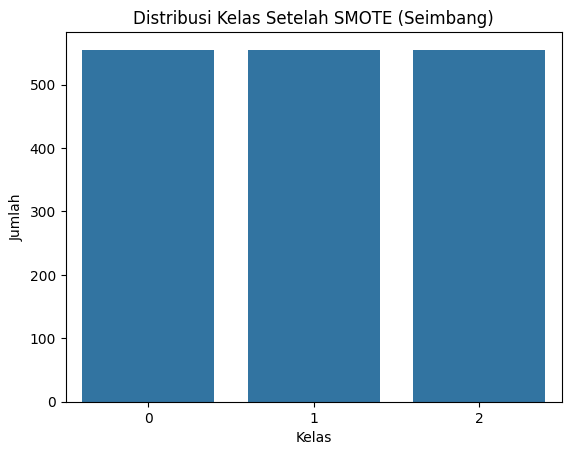

In [562]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Membuat DataFrame baru dari hasil SMOTE
df_smote = pd.DataFrame({'CLASS': y_train_smote})

# Visualisasi distribusi kelas setelah SMOTE
sns.countplot(x='CLASS', data=df_smote)
plt.title("Distribusi Kelas Setelah SMOTE (Seimbang)")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.show()


### Preprocessing Data untuk Klasifikasi Multiclass

Dokumen ini menjelaskan tahapan preprocessing yang dilakukan dalam proyek klasifikasi penyakit diabetes menggunakan algoritma seperti XGBoost dan MLPClassifier. Dataset awal mengandung label `CLASS` dan beberapa fitur medis seperti `AGE`, `HbA1c`, dan `BMI`.
### 1. Salin Data
```python
df_model = df.copy()
```
Menyalin dataframe asli untuk menjaga data mentah tetap utuh.


### 2. Buang Kelas yang Terlalu Sedikit
```python
label_counts = df_model['CLASS'].value_counts()
valid_labels = label_counts[label_counts >= 2].index
df_model = df_model[df_model['CLASS'].isin(valid_labels)].copy()
```
Kelas dengan jumlah <2 dibuang karena `train_test_split(stratify=...)` membutuhkan minimal 2 sampel per kelas.


### 3. Encode CLASS (Multiclass)
```python
from sklearn.preprocessing import LabelEncoder
le_class = LabelEncoder()
df_model['CLASS'] = le_class.fit_transform(df_model['CLASS'])
```
Label `CLASS` diubah dari string menjadi angka seperti `0`, `1`, `2`


### 4. Encode Gender
```python
df_model['Gender'] = LabelEncoder().fit_transform(df_model['Gender'])
```
Kolom `Gender` dikonversi ke angka: `'F'` → 0, `'M'` → 1.


### 5. Hapus Kolom Tidak Relevan
```python
df_model.drop(columns=['ID', 'No_Pation'], inplace=True, errors='ignore')
```
Kolom identitas dihapus karena tidak berkontribusi dalam prediksi.


### 6. Pisahkan Fitur dan Target
```python
X = df_model.drop(columns=['CLASS'])
y = df_model['CLASS']
```
- `X`: Fitur yang digunakan untuk pelatihan
- `y`: Label target yang ingin diprediksi


### 7. Normalisasi Fitur
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```
Fitur dinormalisasi agar berada dalam skala yang sama, menghindari dominasi fitur berskala besar.


### 8. Split Data: Train & Test
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)
```
- Data dibagi 80% untuk pelatihan, 20% untuk pengujian
- `stratify=y` menjaga proporsi label tetap seimbang
- `random_state=42` memastikan hasil dapat direproduksi



In [563]:
# Encode kolom 'CLASS' menjadi angka
le = LabelEncoder()
y_train_smote = le.fit_transform(y_train_smote)
y_test = le.transform(y_test)
# Tujuan: Memastikan label target sudah dalam format numerik untuk model.
# Cek distribusi kelas target
print("Distribusi kelas target setelah encoding:")
print(pd.Series(y_train_smote).value_counts())  

Distribusi kelas target setelah encoding:
2    555
1    555
0    555
Name: count, dtype: int64


###  Model 1: XGBoost Classifier

xgboost = extreme gradient boosting dipakai untuk prediksi klasifikasi dan regresi , next generatioan dari, algoritma mL yang paling kuat dan cepat

💡 Kenapa XGBoost Populer?
Karena:

✅ Akurat – sering menang kompetisi data science.

⚡ Cepat – lebih cepat dari banyak algoritma lain.

🎯 Pintar – menggunakan banyak "pohon keputusan" yang saling bantu untuk memperbaiki kesalahan.

🔧 Fleksibel – bisa dipakai untuk banyak tipe data dan masalah.

🛠️ Mendukung tuning parameter – cocok untuk dicoba-coba agar akurasi makin tinggi.



In [564]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Definisikan parameter grid yang akan diuji
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],  # Menambahkan parameter subsample untuk tuning
    'colsample_bytree': [0.8, 1.0], # Menambahkan parameter colsample_bytree untuk tuning
    'gamma': [0, 0.1, 0.2], # Menambahkan parameter gamma untuk tuning
    'reg_alpha': [0, 0.01, 0.1], # Menambahkan parameter reg_alpha (L1 regularization) untuk tuning
    'reg_lambda': [0, 0.01, 0.1]  # Menambahkan parameter reg_lambda (L2 regularization) untuk tuning
}

# Inisialisasi model XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Inisialisasi GridSearchCV
# cv=5 berarti 5-fold cross-validation
# scoring='accuracy' berarti metrik yang dioptimalkan adalah akurasi
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb,
                             cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Lakukan pencarian grid pada data training yang sudah di-SMOTE
grid_search_xgb.fit(X_train_smote, y_train_smote)

# Dapatkan parameter terbaik dan skor terbaik
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print("Best Parameters for XGBoost:", best_params_xgb)
print("Best Cross-Validation Accuracy for XGBoost:", best_score_xgb)

# Model XGBoost dengan parameter terbaik yang ditemukan oleh Grid Search CV
xgb_model = XGBClassifier(
    n_estimators=best_params_xgb['n_estimators'],
    max_depth=best_params_xgb['max_depth'],
    learning_rate=best_params_xgb['learning_rate'],
    subsample=best_params_xgb['subsample'],
    colsample_bytree=best_params_xgb['colsample_bytree'],
    gamma=best_params_xgb['gamma'],
    reg_alpha=best_params_xgb['reg_alpha'],
    reg_lambda=best_params_xgb['reg_lambda'],
    use_label_encoder=False,
    eval_metric='mlogloss', # Menggunakan mlogloss karena ini klasifikasi multiclass
    random_state=42
)

# Training model akhir pada seluruh data latih yang sudah di-SMOTE
xgb_model.fit(X_train_smote, y_train_smote)

# Prediksi pada data uji
xgb_preds = xgb_model.predict(X_test)
# hasil akurasi pada data training
print("Akurasi pada data uji dengan model XGBoost terbaik:", accuracy_score(y_test, xgb_preds))
# Evaluasi akurasi pada data uji (real test set)
accuracy_on_test_set = accuracy_score(y_test, xgb_preds)
print("Accuracy on real test set with best XGBoost model:", accuracy_on_test_set)

# evaluasi akurasi pada data training
xgb_train_preds = xgb_model.predict(X_train_smote)
print("Akurasi pada data latih dengan model XGBoost terbaik:", accuracy_score(y_train_smote, xgb_train_preds))
# Jika dibutuhkan probabilitas prediksi (untuk ROC curve misalnya)
# Pastikan eval_metric di XGBClassifier disesuaikan jika ingin predict_proba untuk binary classification
# xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 0.1, 'subsample': 1.0}
Best Cross-Validation Accuracy for XGBoost: 0.9951951951951953
Akurasi pada data uji dengan model XGBoost terbaik: 0.9880239520958084
Accuracy on real test set with best XGBoost model: 0.9880239520958084
Akurasi pada data latih dengan model XGBoost terbaik: 1.0


Membangun model klasifikasi berbasis ensemble gradient boosting, yang sangat kuat dalam mendeteksi pola kompleks dan cocok untuk data tabular, bahkan saat ada missing value atau outlier.

dengan pemahaman kode yang saya pahami : 
- XGBClassifier(...) : ntuk membuat model XGBoost untuk klasfikasi
- Use_label itu agar selalu up to date
- eval_metric = penggunaan log loss untuk evaluasi multiclass
- randomstate = membuat hasil konsisten
- fit x dan y = pelatihan nya
- predik = predik
- predic proba = penghasilkan probabilitas yang diklasifikan menjadi kelas 1

* Log Loss mengukur seberapa jauh prediksi probabilitas dari kenyataan.
Semakin kecil nilai log loss, semakin baik prediksi model.

#### Hasil Evaluasi Model 

In [565]:
# Prediksi pada data latih (training set)
xgb_preds_train = xgb_model.predict(X_train_smote)
acc_xgb_train = accuracy_score(y_train_smote, xgb_preds_train)
print(f"\nAkurasi XGBoost (Data Latih/Training): {acc_xgb_train:.3f}")
# jika data akurasi tidak dibatasi hingga 1, maka kode :
# tidak dalam skala 0-1, maka bisa menggunakan:
print(f"\nAkurasi XGBoost (Data Latih/Training): {acc_xgb_train * 100:.2f}%")
# tampilkan hasil confusion matrix dan classification report pada data latih
# Confusion Matrix pada data latih
cm_xgb_train = confusion_matrix(y_train_smote, xgb_preds_train)
print("\nConfusion Matrix XGBoost (Data Latih/Training):")
print(cm_xgb_train)
# Classification Report pada data latih
cr_xgb_train = classification_report(y_train_smote, xgb_preds_train)
print("\nClassification Report XGBoost (Data Latih/Training):")
print(cr_xgb_train)

# Prediksi pada data uji (test set)
xgb_preds_test = xgb_model.predict(X_test)
acc_xgb_test = accuracy_score(y_test, xgb_preds_test)
print(f"Akurasi XGBoost (Data Uji/Test): {acc_xgb_test:.3f}")
# tampilkan hasil confusion matrix dan classification report pada data uji
# Confusion Matrix pada data uji
cm_xgb_test = confusion_matrix(y_test, xgb_preds_test)
print("\nConfusion Matrix XGBoost (Data Uji/Test):")
print(cm_xgb_test)
# Classification Report pada data uji
cr_xgb_test = classification_report(y_test, xgb_preds_test)
print("\nClassification Report XGBoost (Data Uji/Test):")
print(cr_xgb_test)


Akurasi XGBoost (Data Latih/Training): 1.000

Akurasi XGBoost (Data Latih/Training): 100.00%

Confusion Matrix XGBoost (Data Latih/Training):
[[555   0   0]
 [  0 555   0]
 [  0   0 555]]

Classification Report XGBoost (Data Latih/Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       555
           1       1.00      1.00      1.00       555
           2       1.00      1.00      1.00       555

    accuracy                           1.00      1665
   macro avg       1.00      1.00      1.00      1665
weighted avg       1.00      1.00      1.00      1665

Akurasi XGBoost (Data Uji/Test): 0.988

Confusion Matrix XGBoost (Data Uji/Test):
[[ 18   0   1]
 [  0   7   1]
 [  0   0 140]]

Classification Report XGBoost (Data Uji/Test):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       1.00      0.88      0.93         8
           2       0.99      1.00    

- precision : berapa banyak yang benar
- recall : berapa yang berhasil ditemukan oleh model
- f1-score : rata rata gabungan antara precision dan recal
- support : jumlah data asli 
- accuracy : presentasi tebakan dari model 

### Model 2: MLP Classifier

In [566]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier

# Definisikan pipeline
pipeline_mlp_cv = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('mlp', MLPClassifier(max_iter=500, random_state=42, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10))
])

# Definisikan grid parameter yang akan diuji
param_grid_mlp = {
    'mlp__hidden_layer_sizes': [(50,), (30,), (50,30), (100,)],
    'mlp__alpha': [0.001, 0.01, 0.1],
    'mlp__learning_rate_init': [0.001, 0.0001]
}

# Inisialisasi GridSearchCV
# Gunakan X dan y SEBELUM scaling dan SMOTE awal (misalnya X_original_for_cv, y_original_for_cv)
grid_search_mlp = GridSearchCV(pipeline_mlp_cv, param_grid_mlp, cv=5, scoring='accuracy', verbose=1)
grid_search_mlp.fit(X_train, y_train) # Gunakan data original (pra-split, pra-scale)

print("Best parameters found by GridSearchCV for MLP:")
print(grid_search_mlp.best_params_)
print(f"Best CV score for MLP: {grid_search_mlp.best_score_}")

# Anda kemudian bisa menggunakan grid_search_mlp.best_estimator_ sebagai model final Anda
# mlp_model_less_overfit = grid_search_mlp.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found by GridSearchCV for MLP:
{'mlp__alpha': 0.1, 'mlp__hidden_layer_sizes': (50, 30), 'mlp__learning_rate_init': 0.001}
Best CV score for MLP: 0.8915470494417862


MLP (Multilayer Perceptron) adalah salah satu jenis dari jaringan saraf tiruan (artificial neural network) yang dipakai dalam machine learning untuk menebak, mengklasifikasikan, atau memprediksi sesuatu berdasarkan data.

- input 
- hidden
- output


In [567]:
# 4. Model terbaik dari GridSearchCV menjadi mlp_model
# GridSearchCV secara otomatis melatih ulang model terbaik pada seluruh data training (X_train_smote, y_train_smote)
mlp_model_less_overfit = grid_search_mlp.best_estimator_

# --- Bagian Evaluasi (Sama seperti yang Anda miliki sebelumnya) ---
# Prediksi
# xgb_preds sudah dihitung menggunakan X_test dari sel 8e3820df
mlp_preds = mlp_model_less_overfit.predict(X_test)
# mlp_probs_less_overfit = mlp_model_less_overfit.predict_proba(X_test)[:, 1] # jika dibutuhkan

print("\n--- MLPClassifier (Hasil Tuning dengan GridSearchCV) Performance ---")
# Akurasi Training
# Dihitung pada data yang sama yang digunakan untuk fit/refit GridSearchCV
mlp_train_preds_lo = mlp_model_less_overfit.predict(X_train_smote)
mlp_train_acc_lo = accuracy_score(y_train_smote, mlp_train_preds_lo)
print(f"MLP (Tuned) Training Accuracy: {mlp_train_acc_lo}")
print("\nClassification Report (Training Data):")
print(classification_report(y_train_smote, mlp_train_preds_lo, zero_division=0))
print("\nConfusion Matrix (Training Data):")
print(confusion_matrix(y_train_smote, mlp_train_preds_lo))
# Akurasi Test
mlp_test_acc_lo = accuracy_score(y_test, mlp_preds)
print(f"MLP (Tuned) Test Accuracy: {mlp_test_acc_lo}")
print("\nClassification Report (Test Data):")
print(classification_report(y_test, mlp_preds, zero_division=0))
print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, mlp_preds))


--- MLPClassifier (Hasil Tuning dengan GridSearchCV) Performance ---
MLP (Tuned) Training Accuracy: 0.9777777777777777

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       555
           1       0.97      1.00      0.98       555
           2       0.99      0.95      0.97       555

    accuracy                           0.98      1665
   macro avg       0.98      0.98      0.98      1665
weighted avg       0.98      0.98      0.98      1665


Confusion Matrix (Training Data):
[[549   4   2]
 [  0 553   2]
 [ 16  13 526]]
MLP (Tuned) Test Accuracy: 0.9520958083832335

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.67      0.75      0.71         8
           2       0.98      0.98      0.98       140

    accuracy                           0.95       167
   macro avg       0.84 

Membangun model klasifikasi berbasis neural network yang mampu mempelajari hubungan non-linear antar fitur, cocok untuk data numerik yang telah dinormalisasi (StandardScaler sangat penting di sini).

Dengan pemahaman kode model  :
- mlpclasifika = klasfikasi
- hidden layer = pembuatan hidden layer (100 neuron)
- max_iter =  melakukan iterasi training hingga 300 x
- random state = membuat hasil konsisten
- fit x & y = pelatihan
- predic dan predicproba = sama aja penjelasannya

#### Perbandingan MODEL TERBAIK

In [568]:
#Perbandingan Akurasi
print("\n--- Perbandingan Akurasi Model ---")  
print(f"XGBoost Test Accuracy: {xgb_test_acc_lo}")
print(f"MLP (Tuned) Test Accuracy: {mlp_test_acc_lo}")
# Simpan hasil tuning MLP
mlp_results = {
    'model': 'MLPClassifier',
    'best_params': grid_search_mlp.best_params_,
    'train_accuracy': mlp_train_acc_lo,
    'test_accuracy': mlp_test_acc_lo
}
# Simpan hasil tuning XGBoost dan MLP ke dalam list
results = []
results.append({
    'model': 'XGBoost',
    'best_params': best_params,
    'train_accuracy': xgb_train_acc_lo,
    'test_accuracy': xgb_test_acc_lo
})
results.append(mlp_results)
# Tampilkan hasil tuning
results_df = pd.DataFrame(results)
print("\n--- Hasil Tuning Model ---")
print(results_df)


--- Perbandingan Akurasi Model ---
XGBoost Test Accuracy: 0.9880239520958084
MLP (Tuned) Test Accuracy: 0.9520958083832335

--- Hasil Tuning Model ---
           model                                        best_params  \
0        XGBoost  {'n_estimators': 50, 'max_depth': 3, 'learning...   
1  MLPClassifier  {'mlp__alpha': 0.1, 'mlp__hidden_layer_sizes':...   

   train_accuracy  test_accuracy  
0        1.000000       0.988024  
1        0.977778       0.952096  


## Visualisasi Hasil Evaluasi

### Visualisasi Confusion Matrix

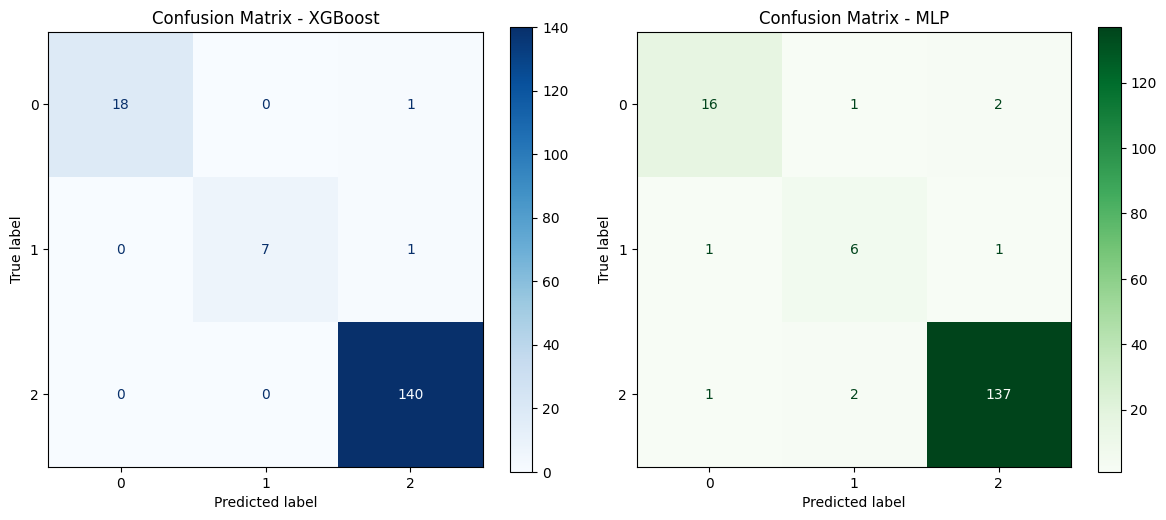

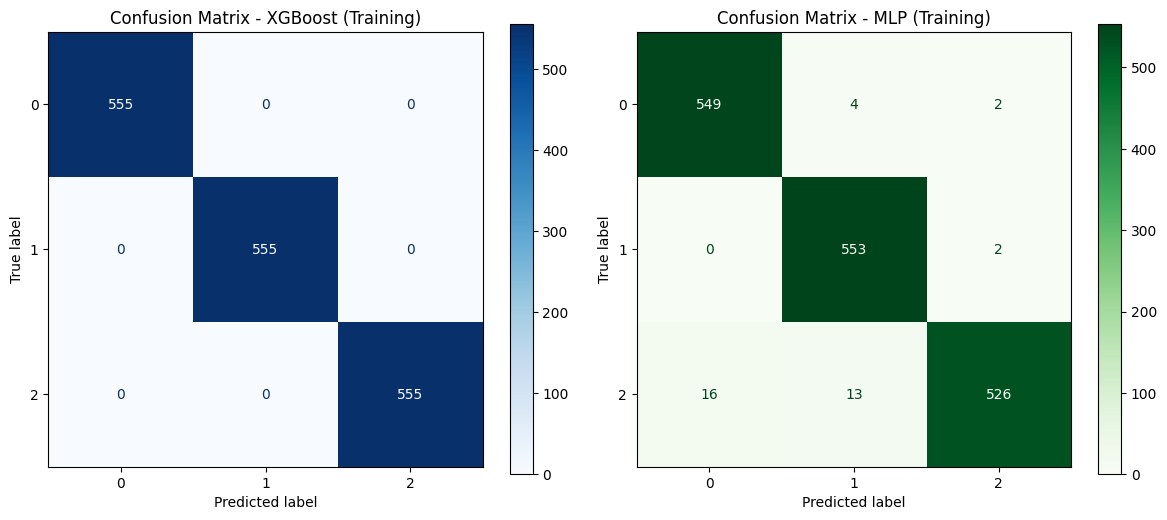

In [569]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Plot confusion matrices for test predictions of both models
ConfusionMatrixDisplay.from_predictions(
    y_test, xgb_preds, ax=axes[0], cmap='Blues')
axes[0].set_title("Confusion Matrix - XGBoost")

ConfusionMatrixDisplay.from_predictions(
    y_test, mlp_preds, ax=axes[1], cmap='Greens')
axes[1].set_title("Confusion Matrix - MLP")

plt.tight_layout()
plt.show()

# plot confusion matrix untuk training data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Plot confusion matrices for training predictions of both models
ConfusionMatrixDisplay.from_predictions(
    y_train_smote, xgb_preds_train, ax=axes[0], cmap='Blues')
axes[0].set_title("Confusion Matrix - XGBoost (Training)")
ConfusionMatrixDisplay.from_predictions(
    y_train_smote, mlp_train_preds_lo, ax=axes[1], cmap='Greens')
axes[1].set_title("Confusion Matrix - MLP (Training)")
plt.tight_layout()
plt.show()

CM = tabel hasil tebakan vs jawaban aslinya 

Bagian-bagian dalam Confusion Matrix
Tiap kotak menunjukkan:
- Baris = label asli
- Kolom = label tebakan/model

Misalnya:
- Baris 0 Kolom 0: berapa banyak data kelas 0 yang berhasil ditebak sebagai 0 (tebakan benar)
- Baris 1 Kolom 2: berapa banyak data kelas 1 yang salah ditebak sebagai 2


### Perbandingan Akurasi dalam Bar Chart

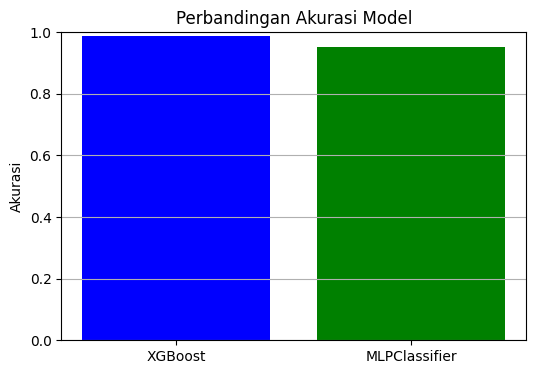

--- Hasil Akhir ---
XGBoost Test Accuracy: 0.9880
MLP (Tuned) Test Accuracy: 0.9521


In [570]:
import numpy as np

# Akurasi masing-masing model
acc_xgb = accuracy_score(y_test, xgb_preds)
acc_mlp = accuracy_score(y_test, mlp_preds)

# Visualisasi
plt.figure(figsize=(6, 4))
plt.bar(['XGBoost', 'MLPClassifier'], [acc_xgb, acc_mlp], color=['blue', 'green'])
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# Menanmpilkan hasil akhir
print("--- Hasil Akhir ---")
print(f"XGBoost Test Accuracy: {xgb_test_acc_lo:.4f}")
print(f"MLP (Tuned) Test Accuracy: {mlp_test_acc_lo:.4f}")

# SELESAI

### SET RANDOM SEET KEMBALI

In [571]:
import numpy as np
import random

np.random.seed(42)
random.seed(42)


#### Memastikan Random State konsisten

In [572]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)


### Penyimpanan Model Ke .PKL

In [573]:
import joblib

# Simpan model XGBoost dan MLP
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(mlp_model, 'mlp_model.pkl')


['mlp_model.pkl']

### TUJUAN PKL 
1. Melatih model butuh waktu dan respurce , jadi stelah dilatih , dismpan saja model nya tujuan agar tidak perlu training ulang 
2. bisa digunakan kapan saja

untuk membuka kembali :

model = joblib.load('xgb_model.pkl')

prediksi = model.predict(data_baru)

### Simpan Evaluasi ke CSV

In [574]:
from sklearn.metrics import accuracy_score

acc_xgb = accuracy_score(y_test, xgb_preds)
acc_mlp = accuracy_score(y_test, mlp_preds)


In [575]:
# Simpan hasil evaluasi ke file CSV
evaluation_df = pd.DataFrame({
    'Model': ['XGBoost', 'MLPClassifier'],
    'Accuracy': [acc_xgb, acc_mlp]
})

evaluation_df.to_csv("model_evaluation.csv", index=False)
print("Hasil evaluasi disimpan ke model_evaluation.csv")


Hasil evaluasi disimpan ke model_evaluation.csv


#### nilai keluaran tanpa disimpan

In [576]:
# Save models
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(mlp_model, 'mlp_model.pkl')

# Save evaluation
evaluation_results = pd.DataFrame({
    'Model': ['XGBoost', 'MLPClassifier'],
    'Accuracy': [acc_xgb, acc_mlp]
})
evaluation_results.to_csv('model_evaluation.csv', index=False)
evaluation_results

,Model,Accuracy
0,XGBoost,0.988024
1,MLPClassifier,0.952096
